In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.time import Time
import astropy.units as u
from matplotlib.patches import Rectangle
%matplotlib notebook

In [2]:
neowise= pd.read_csv (r"C:\Users\arttu\Downloads\asas3.txt")

In [3]:
neowise= neowise[(neowise['cc_flags'] == '0') 
                  & (neowise['moon_masked'] < 1) 
                  & (neowise['ph_qual'] =='AA') 
                  & (neowise['qual_frame'] > 0)
                  & (neowise['qi_fact'] >0)
                  & (neowise['w2rchi2'] <20)
                  & (neowise['mjd'] != 57866.29045) #57866.290447500003 remove few outliers.
                  & (neowise['mjd'] != 58226.92207) #58226.922066640000.. or just use sigma clip.
                  & (neowise['mjd'] != 58593.7411)] #58593.74109576000

In [6]:
#filtered_NeoWISE_epochs:
#Note that I have calculated min max and mean for each epoch seperately because there is a lot of variability after the event.

filtered_epochs = neowise.groupby('epoch').agg({'mjd': ['mean'], 'w1mpro': ['mean', 'min', 'max'], 'w2mpro': ['mean', 'min', 'max']})

filtered_epochs[('w2mpro', 'err_w2')] =(filtered_epochs[('w2mpro', 'max')] - filtered_epochs[('w2mpro', 'min')]) /2
filtered_epochs[('w1mpro', 'err_w1')] =(filtered_epochs[('w1mpro', 'max')] - filtered_epochs[('w1mpro', 'min')]) /2
filtered_epochs['w1_w2'] =  filtered_epochs[('w1mpro', 'mean')] - filtered_epochs[('w2mpro', 'mean')]
filtered_epochs['time'] = filtered_epochs[('mjd', 'mean')]

filtered_epochs.sort_values('time')

mjd     w1mpro                     w2mpro                  \
               mean       mean     min     max       mean     min     max   
epoch                                                                       
1      56788.089038  11.650158  11.609  11.711  11.714789  11.635  11.839   
2      56978.761492  11.651857  11.600  11.706  11.726905  11.627  11.817   
3      57147.249131  11.648667  11.584  11.723  11.734111  11.653  11.826   
4      57340.970131  11.647667  11.598  11.729  11.711370  11.581  11.851   
5      57506.152460  11.669778  11.585  11.745  11.740278  11.654  11.843   
6      57706.014427  11.671227  11.622  11.735  11.727273  11.656  11.803   
7      57866.678611  11.680357  11.609  11.721  11.746714  11.678  11.810   
8      58072.243466  11.671353  11.635  11.730  11.750059  11.660  11.814   
9      58227.480288  11.316647  11.251  11.351  10.973882  10.909  11.043   
10     58436.494647  11.231167  11.180  11.278  10.897111  10.831  10.956   
11     58594.164164  11.275467  11.233  11.349  10.938267  10.890  10.988   
12     58800.628738  11.218222  11.189  11.244  10.901167  10.806  10.948   
13     58958.378432  11.240882  11.147  11.293  10.915000  10.767  10.980   
14     59167.843385  11.348313  11.310  11.445  11.123750  11.072  11.182   
15     59322.899721  11.346600  11.273  11.399  11.162350  11.082  11.224   
16     59531.977065  11.413105  11.331  11.513  11.229105  11.111  11.295   
17     59689.662084  11.495737  11.449  11.526  11.335421  11.286  11.381   
18     59896.492845  11.610636  11.537  11.659  11.614409  11.538  11.679   

               w1mpro     w1_w2          time  
       err_w2  err_w1                          
epoch                                          
1      0.1020  0.0510 -0.064632  56788.089038  
2      0.0950  0.0530 -0.075048  56978.761492  
3      0.0865  0.0695 -0.085444  57147.249131  
4      0.1350  0.0655 -0.063704  57340.970131  
5      0.0945  0.0800 -0.070500  57506.152460  
6      0.0735  0.0565 -0.056045  57706.014427  
7      0.0660  0.0560 -0.066357  57866.678611  
8      0.0770  0.0475 -0.078706  58072.243466  
9      0.0670  0.0500  0.342765  58227.480288  
10     0.0625  0.0490  0.334056  58436.494647  
11     0.0490  0.0580  0.337200  58594.164164  
12     0.0710  0.0275  0.317056  58800.628738  
13     0.1065  0.0730  0.325882  58958.378432  
14     0.0550  0.0675  0.224563  59167.843385  
15     0.0710  0.0630  0.184250  59322.899721  
16     0.0920  0.0910  0.184000  59531.977065  
17     0.0475  0.0385  0.160316  59689.662084  
18     0.0705  0.0610 -0.003773  59896.492845

In [7]:
#asas_sn-data 
import lightkurve as lk
asas_sn = pd.read_csv ('https://asas-sn.osu.edu/sky-patrol/coordinate/044d7a1e-1073-4f3e-88c8-b18178ae4f34/export.csv')

In [8]:
asas_sn['mjd'] = asas_sn['HJD']-2400000.5 #hjd to mjd

#remove some bad data and separate V from g
vlc = asas_sn[(asas_sn['flux_err'] < 0.5) * (asas_sn['flux(mJy)'] <18) * (asas_sn['Filter']=='V')] 
glc = asas_sn[(asas_sn['flux_err'] < 0.5) * (asas_sn['flux(mJy)'] <18) * (asas_sn['Filter']=='g')] 

#make v and g lightkurve objects
vlc = lk.LightCurve(time= vlc['mjd'], flux= vlc['flux(mJy)'], flux_err= vlc['flux_err'])
glc = lk.LightCurve(time= glc['mjd'], flux= glc['flux(mJy)'], flux_err= glc['flux_err'])

#remove outliers and normalize data:
vlc = vlc.remove_outliers(sigma_lower=float('inf'), sigma =2)
vlc = vlc.normalize()

glc = glc.remove_outliers(sigma_lower=float('inf'), sigma =2)
glc = glc.normalize()
#save:
#glc.to_csv(path_or_buf=r'asas_sn_g_norm.csv', overwrite=True)
#vlc.to_csv(path_or_buf=r'asas_sn_v_norm.csv', overwrite=True)

#one way to remove scattering is binning, we could use shorter bin for g than V because g has more variability...
glc= glc.bin(30)
vlc= vlc.bin(60)

vlc = vlc.remove_nans()
glc = glc.remove_nans()

vlc.sort('time')
glc.sort('time')

In [9]:
v_time= np.array(vlc.time.value)  
v_normalized_pinned_flux= np.array(vlc.flux.value)  
v_err = np.array(vlc.flux_err.value) 

g_time= np.array(glc.time.value)  
g_normalized_pinned_flux= np.array(glc.flux.value)  
g_err = np.array(glc.flux_err.value) 

In [10]:
x1= v_time #mjd
y1= v_normalized_pinned_flux
e1= v_err

x2= g_time #mjd
y2= g_normalized_pinned_flux
e2= g_err

In [ ]:
fig2, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_title('ASASSN-21qj')
ax.set_xlabel('Epoch [MJD]')
ax.set_ylabel('LC MAG')
ax.plot(x2, y2, linewidth = 1, linestyle='-', marker = '^', ms=2, color = 'b', alpha = 0.6)
ax.plot(x1, y1, linewidth = 1, linestyle='-', marker = '>', ms=2, color = 'g', alpha = 0.6)



<IPython.core.display.Javascript object>


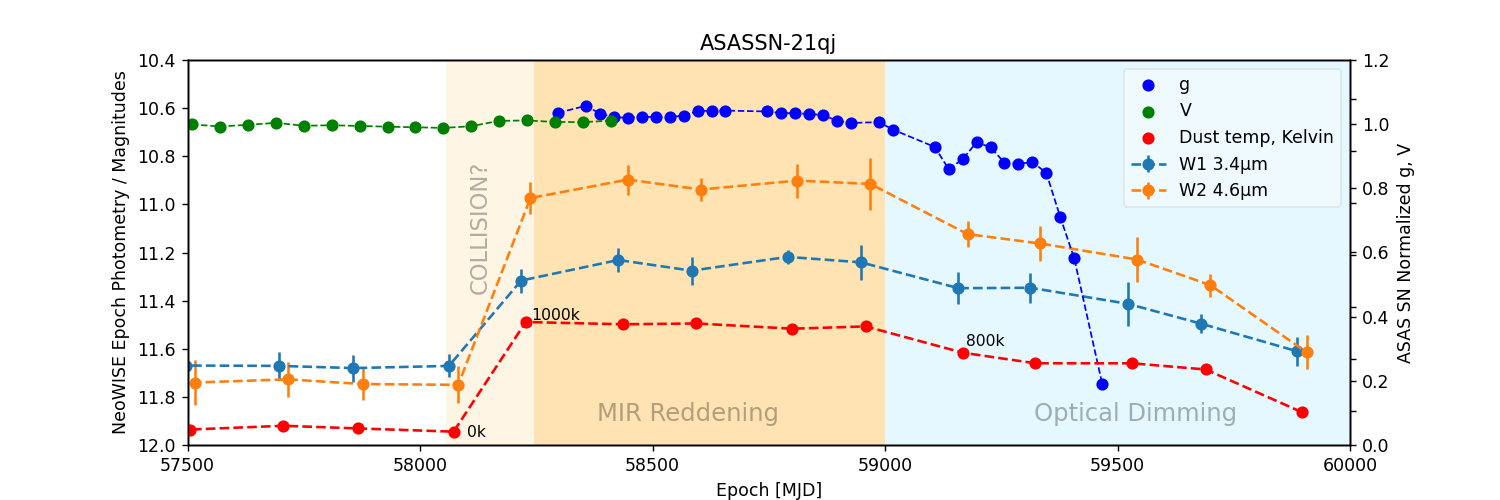

In [15]:
fig, ax1= plt.subplots(1,1,figsize=(12,4))
ax1 = plt.gca()

event_window = (58055, 58245) #from draft
reddening = (58245, 59000) #by eye
optical_dimming =(59000, 60000)

ax1.set_title('ASASSN-21qj')
ax1.set_xlabel('Epoch [MJD]')
ax1.set_ylabel('NeoWISE Epoch Photometry / Magnitudes')

ax1.errorbar(filtered_epochs[('mjd', 'mean')]-10, filtered_epochs[('w1mpro', 'mean')], filtered_epochs[('w1mpro', 'err_w1')],
             marker='o', linestyle= '--', label='W1 3.4μm')
ax1.errorbar(filtered_epochs[('mjd', 'mean')]+10, filtered_epochs[('w2mpro', 'mean')], filtered_epochs[('w2mpro', 'err_w2')],
             marker='o', linestyle= '--', uplims=False, label='W2 4.6μm')

ax1.text(58105, 11.35, 'COLLISION?', fontsize= 13, alpha= 0.3, rotation='vertical')
ax1.text(58380, 11.9, 'MIR Reddening', fontsize= 14, alpha= 0.3, rotation=0)
ax1.text(59320, 11.9, 'Optical Dimming', fontsize= 14, alpha= 0.3, rotation=0)

ax1.set_xlim(57500,60000) 
ax1.set_ylim(12,10.4)

(ymi,yma) = ax1.get_ylim()

sampl =Rectangle((event_window[0], ymi), event_window[1]-event_window[0], (yma-ymi),facecolor="orange", alpha=0.1)
sampl2 =Rectangle((reddening[0], ymi), reddening[1]-reddening[0], (yma-ymi),facecolor="orange", alpha=0.3)
sampl3 =Rectangle((optical_dimming[0], ymi), optical_dimming[1]-optical_dimming[0], (yma-ymi),facecolor="deepskyblue", alpha=0.1)

ax1.add_patch(sampl)
ax1.add_patch(sampl2)
ax1.add_patch(sampl3)

ax2 = ax1.twinx()

ax2.set_ylabel('ASAS SN Normalized g, V')

ax2.plot(x2, y2, linewidth = 1, linestyle='--', marker = 'o', color = 'b', alpha = 1, label='V')
ax2.plot(x1, y1, linewidth = 1, linestyle='--', marker = 'o', color = 'g', alpha = 1, label='g')
ax2.set_ylim (0,1.2)


#dust/ w1-w2 option

ax3 = ax1.twinx()
ax3.errorbar(filtered_epochs[('mjd', 'mean')], filtered_epochs['w1_w2'],marker='o', color = 'r', ls= '--', alpha =1, label='W1-W2' )
ax3.set_ylim (-0.13,1.35)

ax3.text(58240, 0.35, '1000k', fontsize= 9, alpha= 1, rotation=0) 
ax3.text(59175, 0.25, '800k', fontsize= 9, alpha= 1, rotation=0) 
ax3.text(58100, -0.1, '0k', fontsize= 9, alpha= 1, rotation=0) 
plt.setp(ax3.get_yticklabels(), visible=False)

#legend shanagans
legend_line_1 = ax1.scatter( np.NaN, np.NaN, marker = 'o', linestyle='-', color= 'b', label='g' )
legend_line_2 = ax1.scatter( np.NaN, np.NaN, marker = 'o', linestyle='-', color= 'g', label='V' )
legend_line_3 = ax1.scatter( np.NaN, np.NaN, marker = 'o', color= 'red', label='Dust temp, Kelvin')

ax1.legend(facecolor='w', framealpha=0.4, loc=1)

plt.savefig('asas_sn21q_2.png', dpi=300, transparent=False)
